# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


### Answer

#### Part 1 - Question
Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 

#### Part 1 - Answer

We will use information gain on the above samples to decide by which features we split each node. 

Lets start with the initial entropy of the dataset, we have 4 samples and 2 samples from each class, so:
$$H(S)=-(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2}))=1$$

##### Root Node
Now let's evaluate the information gain if we split the root node by each one of the features:

**First Feature**

We have 3 samples with value of 1:
- 2/3 of them is in class 1 and a single sample in class 0

Single sample with class value of 0 and feature value of 0 so:

$$Gain(S|f1)=H(S)-H(S|f1) = 1 - (\frac{3}{4})(-1)(\frac{2}{3}log(\frac{2}{3}) + \frac{1}{3}log(\frac{1}{3})) - \frac{1}{4}*0 = 1 - 0.450 = 0.55$$

**Second Feature**

We have 2 samples with value of 1:
- 1/2 of them is in class 1 and 1/2 in class 0
2 samples with value of 0:
- 1/2 of them is in class 1 and 1/2 in class 0

So:

$$Gain(S|f2)=H(S)-H(S|f2) = 1 - (\frac{1}{2})(-1)(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2})) - (\frac{1}{2})(-1)(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2})) = 1 -0.5 -0.5 = 0.0$$


**Third Feature**

We have 2 samples with value of 1:
- 1/2 of them is in class 1 and 1/2 in class 0
2 samples with value of 0:
- 1/2 of them is in class 1 and 1/2 in class 0

So:

$$Gain(S|f3)=H(S)-H(S|f3) = 1 - (\frac{1}{2})(-1)(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2})) - (\frac{1}{2})(-1)(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2})) = 1 -0.5 -0.5 = 0.0$$

Therfor, bsaed on information gain, we will use the first feature as the feature to split the toor node on.

We will ask in the root node "is f1 value==0?"

For **yes** answer we will get:
$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)
\end{aligned}
$$
(The samples in this node will need to be split based on f2 or f3)

For **no** answer we will get:
$$
\begin{aligned}
((0, 0, 1), 0)
\end{aligned}
$$
(We are done with this side of the tree - the samples in this node will be classidied as class 0)



So Far we have:

![alt text](dt1_vis.png)


##### Left Node Split

Now we have 3 samples in the left node to be split by either f2 / f3, let's evaluate the gains again:

$$Gain(S|f2)=H(S)-H(S|f2) = 1 - (\frac{2}{3})(-1)(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2})) - (\frac{1}{3})*0 = 1 -\frac{2}{3} -0 = \frac{1}{3}$$

$$Gain(S|f3)=H(S)-H(S|f3) = 1 - (\frac{1}{3})*0 - (\frac{2}{3})(-1)(\frac{1}{2}log(\frac{1}{2}) + \frac{1}{2}log(\frac{1}{2})) = 1 -\frac{2}{3} -0 = \frac{1}{3}$$

We see that we get the same gain here, we can use either of them, let's show that in both cases the train error is at least 1/4 as required:

**Split by f2**

![alt text](dt1_f2.png)

So a split for the left node using the 2nd feature, will result in 1 error.

So the train error rate will be 1/4.


**Split by f3**

![alt text](dt1_f3.png)

So a split for the left node using the 2nd feature, will result in 1 error.

So the train error rate will be 1/4.



##### Bottom line

We've shown that if we use information gain for splitting, we will end up with an error rate of at least 1/4 any way we choose to split / classify.

#### Part 2 - Question

Find a decision tree of depth 2, which attains zero training error.

#### Part 2 - Answer


I've easily found that if we don't use the "greedy" behavior of spltting by highest information gain and instead we split the root node by the 3rd feature we can get the next tree (with 0 errors in train):

![alt text](dt2_vis.png)



## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [5]:
class Node():
  """Helper class for tree node"""

  def __init__(self, feature_name, split_value):
    self.feature_name = feature_name
    self.split_value = split_value
    self.left_node = None
    self.right_node = None
    self.is_leaf = False
    self.predicted_class = None
  
  def set_leaf(self, predicted_class):
    """Sets the current instance as leaf.

    Args:
        predicted_class: The value of prediction
    """
    self.is_leaf = True
    self.predicted_class = predicted_class

  def predict_sample(self, sample):
    if self.is_leaf:
      return self.predicted_class
    else:
      if sample[self.feature_name].iloc[0] < self.split_value:
        return self.left_node.predict_sample(sample)
      return self.right_node.predict_sample(sample)


class DecisionTree():

  def __init__(self, X, y, min_leaf):
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    self.X = pd.DataFrame(X, columns=feature_names)
    self.y = pd.Series(y)
    self.min_leaf=min_leaf
    self.features = feature_names
    self.root_node=None
    self.is_fitted=False
    self.fit(self.X, self.y)
    

  def predict(self, X):
    if self.is_fitted == False:
      print("Cannot predict before fitting")
    else:
      preds = []
      for sample in X:
        sample_df = pd.DataFrame(np.expand_dims(sample, axis=1).T, columns=self.features)
        preds.append(self.root_node.predict_sample(sample_df))
      return np.array(preds)
        

  def fit(self, X, y):
    root_node_feature, root_node_split_value = self.get_best_split(X, y)
    self.root_node = Node(root_node_feature, root_node_split_value)
    self.grow_tree(X, y, self.root_node)
    self.is_fitted = True
    pass


  def grow_tree(self, X, y, current_node):
  
    # If feature_name is null it means we did not find a split with more than min_leaf samples in one of the nodes -> this is a leaf node
    if current_node.feature_name is None:
      # Using the most common value for prediction since this should also work for binary classification (otherwise I would have used mean value here)
      current_node.set_leaf(np.mean(y))
      return

    # Otherwise, we keep growing the tree
    split_mask = X[current_node.feature_name] < current_node.split_value

    left_node_feature, left_node_split_value = self.get_best_split(X[split_mask], y[split_mask])
    current_node.left_node = Node(feature_name=left_node_feature, split_value=left_node_split_value)
    self.grow_tree(X[split_mask], y[split_mask], current_node.left_node)
    
    right_node_feature, right_node_split_value = self.get_best_split(X[~split_mask], y[~split_mask])
    current_node.right_node = Node(feature_name=right_node_feature, split_value=right_node_split_value)
    self.grow_tree(X[~split_mask], y[~split_mask], current_node.right_node)


  def get_best_split(self, X, y):
    """
    Returns the best split feature name and split value (using reduction in variance)
    """

    samples = X.copy()
    samples['label'] = y
    
    best_feature = None
    split_value = None
    best_variance = np.inf
    
    for feature in self.features:      

      samples_sorted_by_feature = samples.sort_values(feature)

      # Look for indices where the value of the label changes compared to the previous feature value
      # df.ne -> returns not equals boolean mask based on index
      # df.shift -> creates the same dataframe but shift the index by 1
      feature_potential_split_points_mask = samples_sorted_by_feature.label.ne(samples_sorted_by_feature.label.shift())
      feature_split_values = samples_sorted_by_feature[feature_potential_split_points_mask][feature].unique().tolist()

      for feature_val in feature_split_values:
        
        split_mask = samples_sorted_by_feature[feature] < feature_val
        # If split creates leafs smaller than the min_leaf size we skip here
        if np.count_nonzero(split_mask) < self.min_leaf or np.count_nonzero(~split_mask) < self.min_leaf:
          continue 
        
        current_variance = self.get_reduction_in_variance(y, split_mask)

        if current_variance < best_variance:
          best_variance = current_variance
          best_feature = feature
          split_value = feature_val
    
    return best_feature, split_value
      

  def get_reduction_in_variance(self, y, mask):
    """
    Evaluate the train squared error for splitting criterion

    y (np.array): Samples to be separated into nodes
    mask (np.array): Boolean mask array of the current separation of samples
    """
    left_node = y.to_numpy()[mask]
    left_node_size = left_node.shape[0]
    left_node_mean = left_node.mean()
    left_node_variance = np.sum(np.square(left_node - left_node_mean))

    right_node = y.to_numpy()[~mask]
    right_node_size = right_node.shape[0]
    right_node_mean = right_node.mean()
    right_node_variance = np.sum(np.square(right_node - right_node_mean))

    # Return the weighted average variance of the 2 child nodes based on the split mask
    return (left_node_size * left_node_variance + right_node_size * right_node_variance) / (left_node_size + right_node_size)




In [6]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# I did not use load_boston() due to deprecation:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# Split dataset to train / test sets

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

In [7]:
# Evaluate different params

dt_by_min_leaf = {}

for min_leaf in [1, 5, 10, 100]:
      dt = DecisionTree(X_train, y_train, min_leaf)
      train_mse = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
      test_mse = mean_squared_error(y_true=y_test, y_pred=dt.predict(X_test))
      print(f"min_leaf:{min_leaf} --- Train MSE: {train_mse} --- Test MSE: {test_mse}")
      dt_by_min_leaf[min_leaf] = dt


min_leaf:1 --- Train MSE: 0.0 --- Test MSE: 133.8783464566929
min_leaf:5 --- Train MSE: 45.297978839468946 --- Test MSE: 80.35498553412471
min_leaf:10 --- Train MSE: 47.657863411047025 --- Test MSE: 82.73747365415852
min_leaf:100 --- Train MSE: 72.13955266861085 --- Test MSE: 82.56833958657661


The min_leaf=1 model is just overfitting to the train data.

In this scenario I would say that the tree with min_leaf=5 is better as it has better results on the test set and the absolute diff of train vs. test MSE is the lowest.

##### Scatter plot of predictions vs label

I will plot both 1 min_leaf + 5 min_leaf.

/Users/adahan/opt/anaconda3/envs/py4dp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


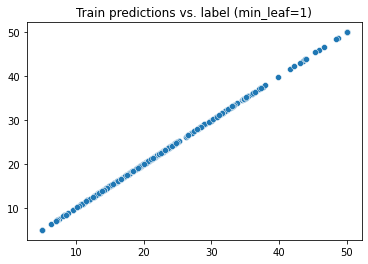

/Users/adahan/opt/anaconda3/envs/py4dp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


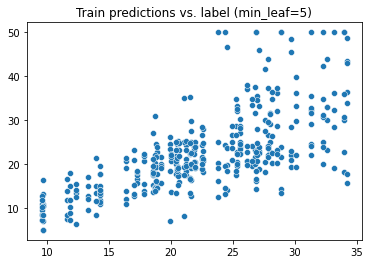

In [10]:
import seaborn as sns

for i in [1, 5]:
    dt = dt_by_min_leaf.get(i)
    train_preds = dt.predict(X_train)
    sns.scatterplot(train_preds, y_train)
    plt.title(f'Train predictions vs. label (min_leaf={i})')
    plt.show()

## Using Decision Tree for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

## Answer

#### Loading the data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
mnist = fetch_openml('mnist_784')

print("Image Data Shape" + str(mnist.data.shape))
print("Label Data Shape" + str(mnist.target.shape))

Image Data Shape(70000, 784)
Label Data Shape(70000,)


In [13]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [15]:
# Split the dataset
seed=0
train_x, test_x, train_y, test_y = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=seed)

#### Decision Trees

We will try to optimize the model hyper params with a CV grid search.
I did not try to use binary pixel values in this case.

The following params will be tested as part of the grid:
1. criterion - gini / entropy
2. max_depth - 4 / 8 / 16
3. min_samples_split - 2 / 4 / 8 / 16
4. min_samples_leaf - 1 / 2 / 4

In [16]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    "criterion": ("gini", "entropy"),
    "max_depth": (4, 8, 16),
    "min_samples_split": (2, 4, 8, 16),
    "min_samples_leaf": (1, 2, 4),
    "random_state": (seed,)
}
dtree = DecisionTreeClassifier()

clf = GridSearchCV(dtree, parameters)

clf.fit(X=train_x, y=train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (4, 8, 16), 'min_samples_leaf': (1, 2, 4),
                         'min_samples_split': (2, 4, 8, 16),
                         'random_state': (0,)})

In [17]:
# print best model params
print(clf.best_params_) 

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [18]:
# Get train and test predictions
train_preds = clf.predict(train_x) 
test_preds = clf.predict(test_x) 

Train score: 0.9978666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5188
           1       1.00      1.00      1.00      5906
           2       1.00      1.00      1.00      5204
           3       1.00      1.00      1.00      5378
           4       1.00      1.00      1.00      5148
           5       1.00      1.00      1.00      4720
           6       1.00      1.00      1.00      5166
           7       0.99      1.00      1.00      5456
           8       1.00      1.00      1.00      5112
           9       0.99      0.99      0.99      5222

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



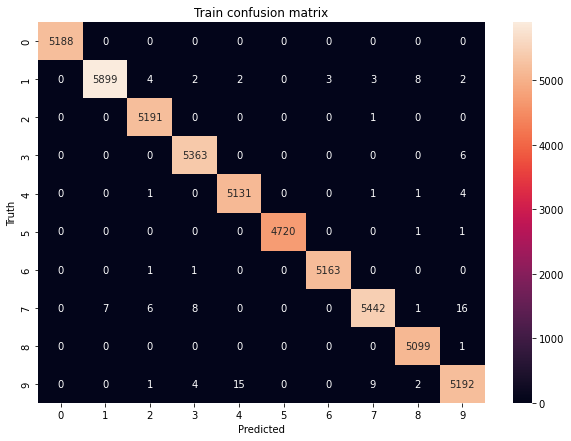

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

train_confm = confusion_matrix(train_preds, train_y)


plt.figure(figsize=(10,7))
sns.heatmap(train_confm ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Train confusion matrix')
print(f"Train score: {clf.score(train_x, train_y)}")
print(f"Classification Report:\n{classification_report(train_y, train_preds)}")

Test score: 0.8750857142857142
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1715
           1       0.94      0.96      0.95      1971
           2       0.86      0.85      0.85      1786
           3       0.84      0.85      0.84      1763
           4       0.87      0.87      0.87      1676
           5       0.84      0.82      0.83      1593
           6       0.89      0.91      0.90      1710
           7       0.90      0.89      0.89      1837
           8       0.84      0.83      0.83      1713
           9       0.84      0.84      0.84      1736

    accuracy                           0.88     17500
   macro avg       0.87      0.87      0.87     17500
weighted avg       0.87      0.88      0.87     17500



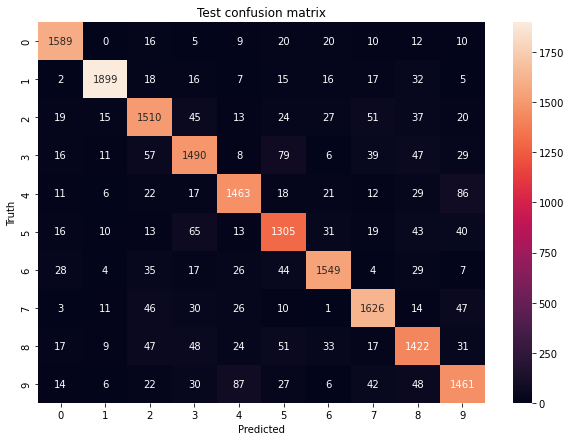

In [20]:
test_confm = confusion_matrix(test_preds, test_y)

plt.figure(figsize=(10,7))
sns.heatmap(test_confm ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Test confusion matrix')
print(f"Test score: {clf.score(test_x, test_y)}")
print(f"Classification Report:\n{classification_report(test_y, test_preds)}")

##### Feature importance (per pixel)

<AxesSubplot:>

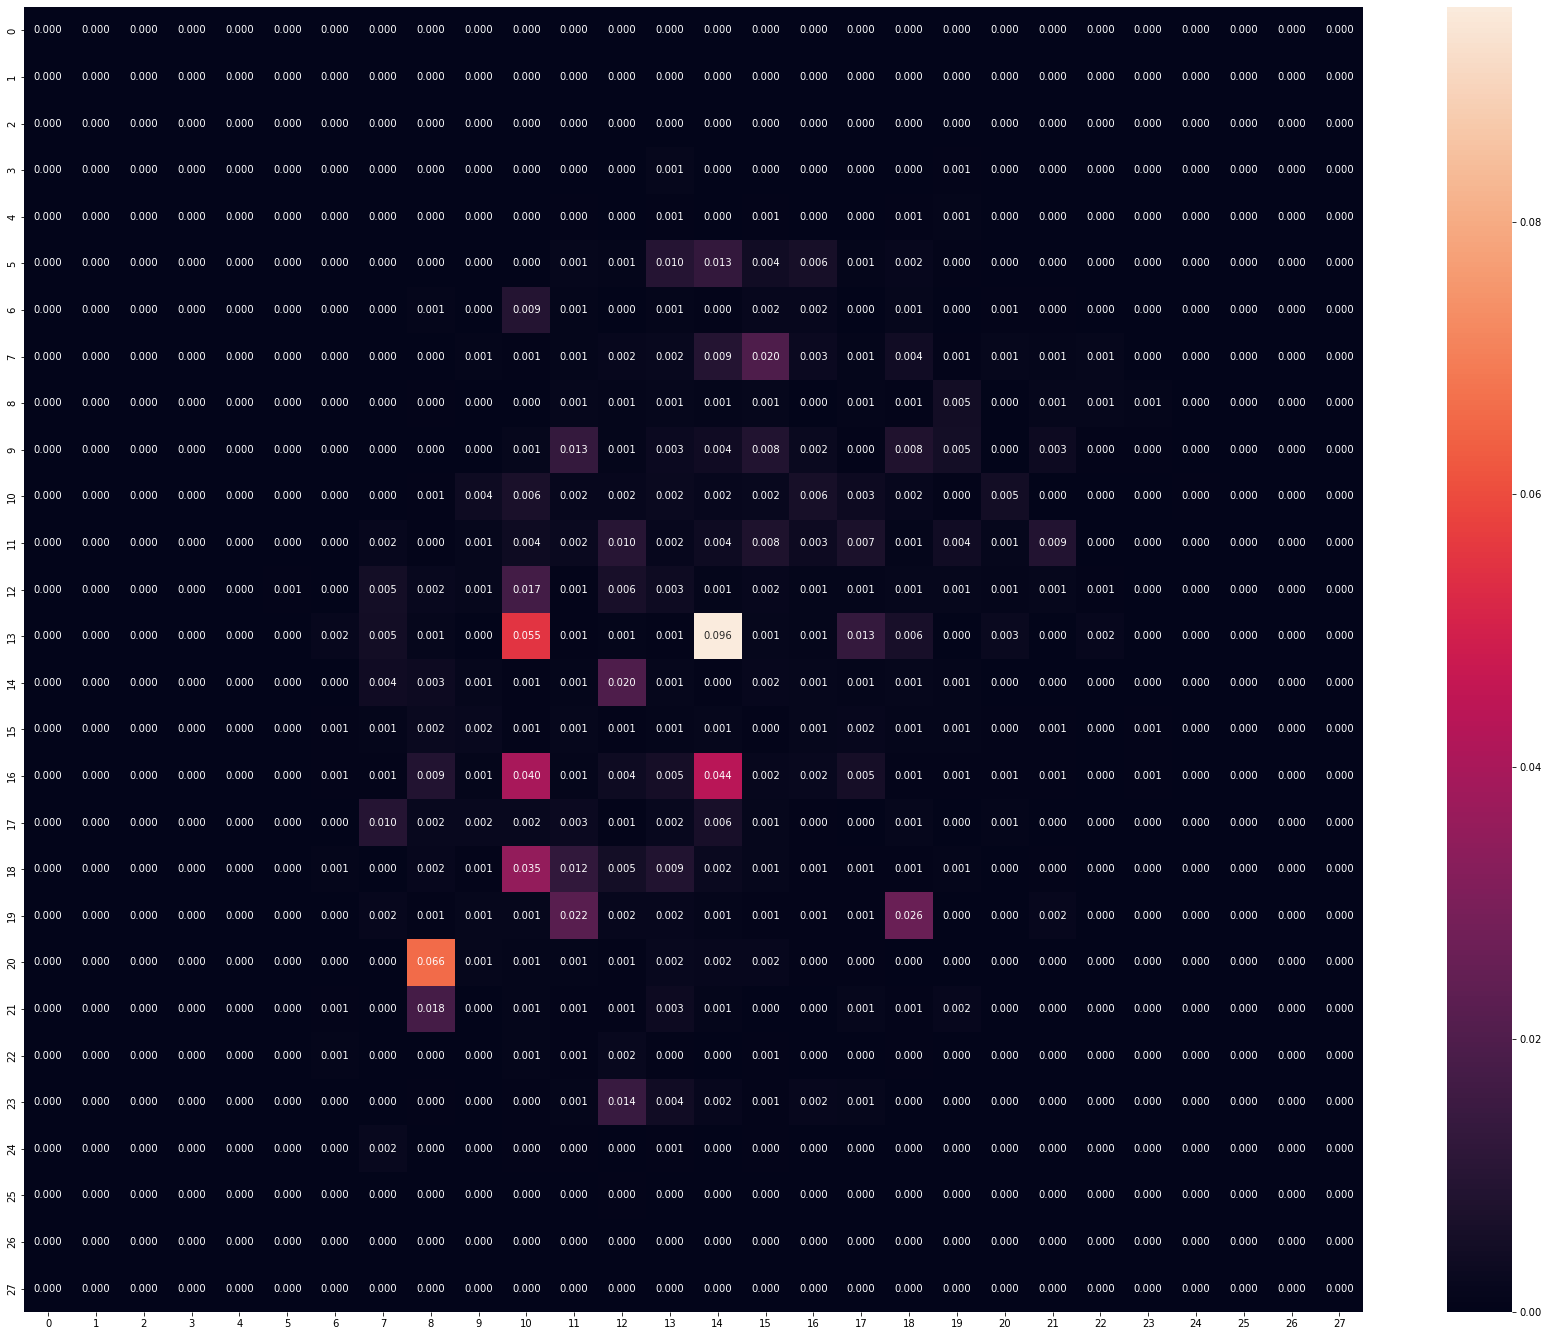

In [21]:
feature_importances = clf.best_estimator_.feature_importances_.reshape((28, 28))
plt.figure(figsize=(30, 24))
sns.heatmap(feature_importances ,annot=True, fmt='.3f')

#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

params_grid = {
    "criterion": ("gini", "entropy"),
    "max_depth": (None, 16, 64),
    "max_features": ('auto', 'sqrt'),
    "min_samples_split": (2, 8),
    "min_samples_leaf": (1, 2, 4),
    "n_estimators": (50, 100, 200, 300),
    "random_state": (seed,)
    
}

rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, params_grid)
rf_clf.fit(X=train_x, y=train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini',), 'max_depth': (None,),
                         'max_features': ('auto',), 'min_samples_leaf': (1, 2),
                         'min_samples_split': (2,), 'n_estimators': (300,),
                         'random_state': (0,)})

In [26]:
# print best model params
print(rf_clf.best_params_) 

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}


In [27]:
# Get train and test predictions
train_preds_rf = rf_clf.predict(train_x) 
test_preds_rf = rf_clf.predict(test_x) 

Train score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5188
           1       1.00      1.00      1.00      5906
           2       1.00      1.00      1.00      5204
           3       1.00      1.00      1.00      5378
           4       1.00      1.00      1.00      5148
           5       1.00      1.00      1.00      4720
           6       1.00      1.00      1.00      5166
           7       1.00      1.00      1.00      5456
           8       1.00      1.00      1.00      5112
           9       1.00      1.00      1.00      5222

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500



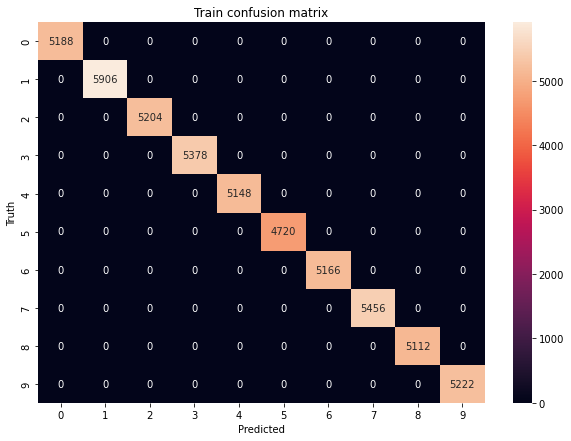

In [28]:
train_confm_rf = confusion_matrix(train_preds_rf, train_y)

plt.figure(figsize=(10,7))
sns.heatmap(train_confm_rf ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Train confusion matrix')
print(f"Train score: {rf_clf.score(train_x, train_y)}")
print(f"Classification Report:\n{classification_report(train_y, train_preds_rf)}")

Test score: 0.9673714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1715
           1       0.98      0.99      0.99      1971
           2       0.95      0.97      0.96      1786
           3       0.97      0.95      0.96      1763
           4       0.97      0.97      0.97      1676
           5       0.97      0.96      0.97      1593
           6       0.97      0.98      0.98      1710
           7       0.97      0.96      0.96      1837
           8       0.95      0.96      0.96      1713
           9       0.95      0.95      0.95      1736

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



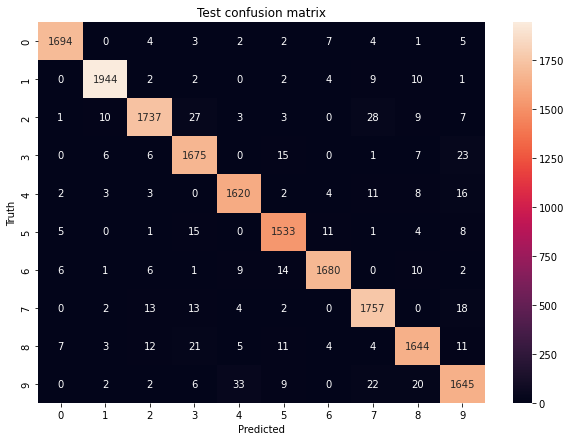

In [29]:
test_confm_rf = confusion_matrix(test_preds_rf, test_y)

plt.figure(figsize=(10,7))
sns.heatmap(test_confm_rf, annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Test confusion matrix')
print(f"Test score: {rf_clf.score(test_x, test_y)}")
print(f"Classification Report:\n{classification_report(test_y, test_preds_rf)}")

##### Feature importance (per pixel)

<AxesSubplot:>

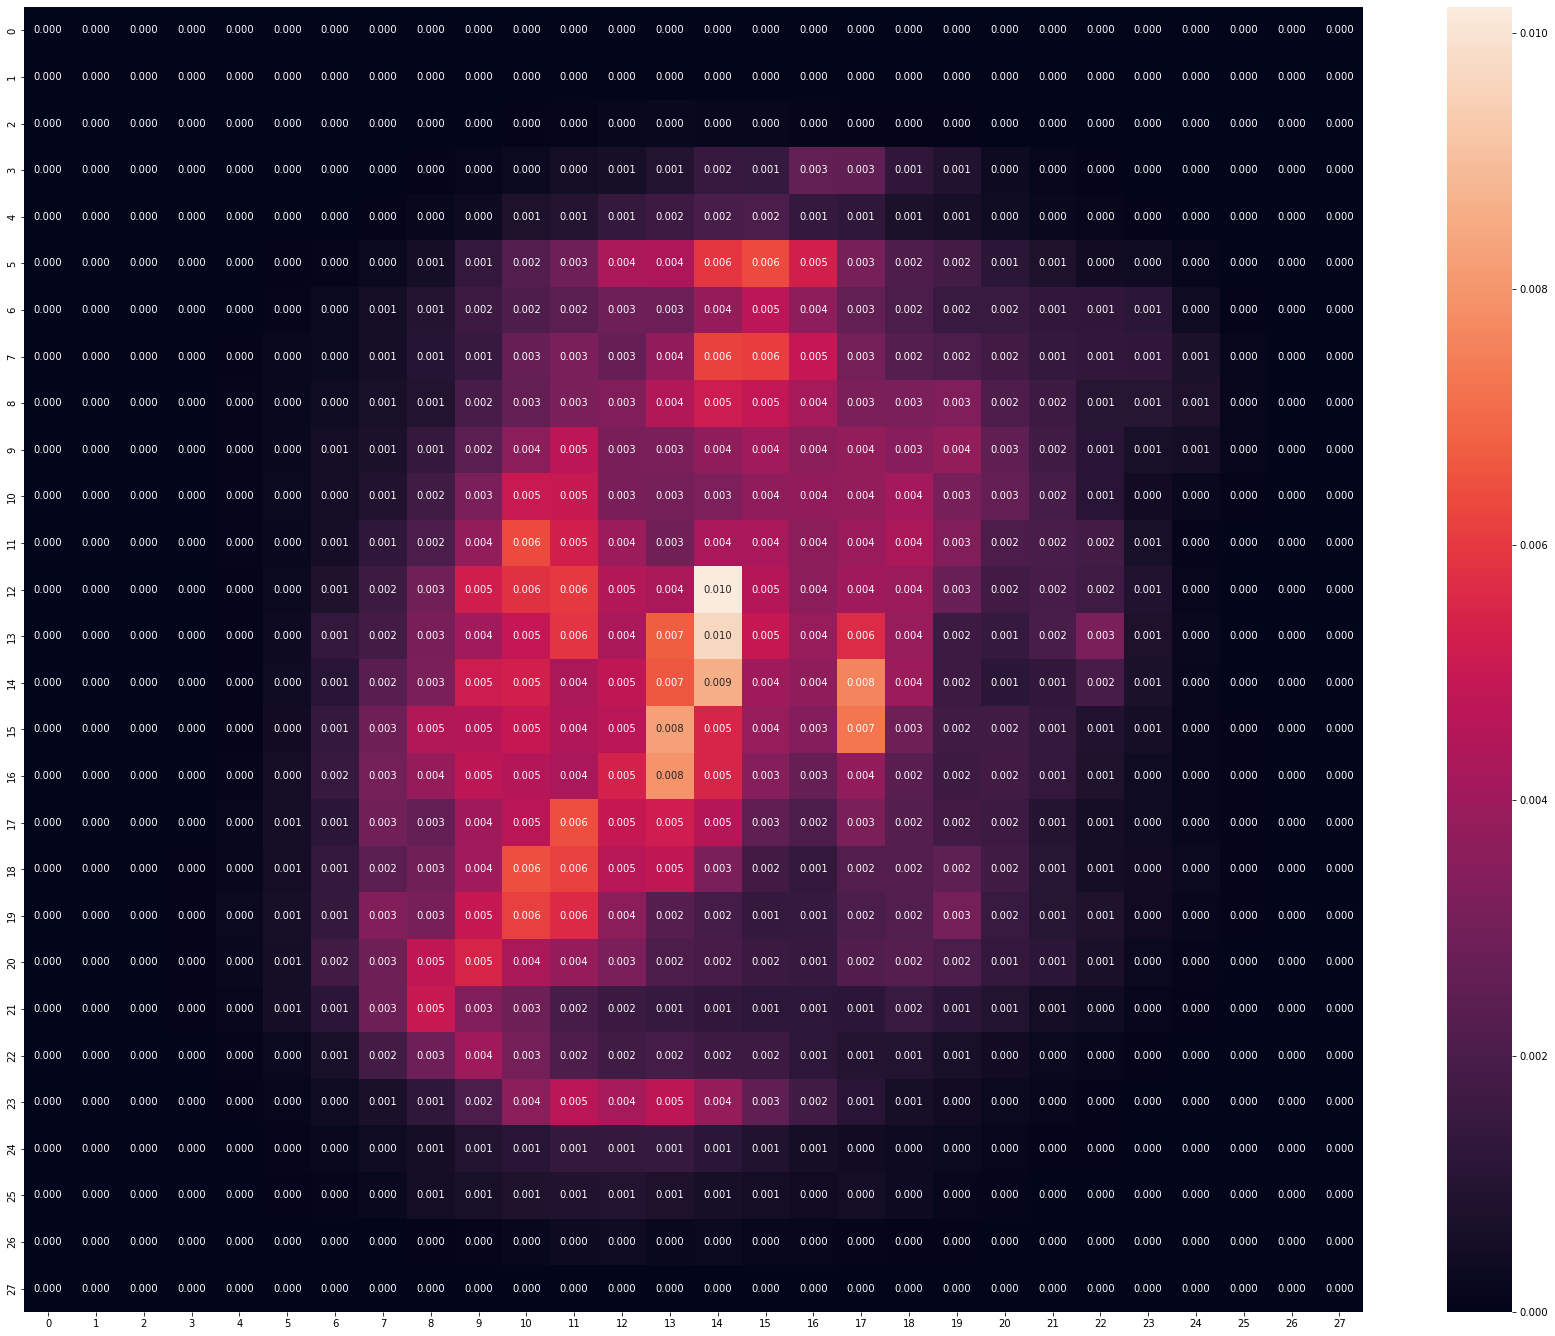

In [30]:
feature_importances = rf_clf.best_estimator_.feature_importances_.reshape((28, 28))
plt.figure(figsize=(30, 24))
sns.heatmap(feature_importances ,annot=True, fmt='.3f')

In [35]:
# Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.

predicted_probs =  rf_clf.predict_proba(test_x)

p_correct = []
p_mistake = []

y_test_ints = np.array(test_y.astype(int))

for index, max_p in enumerate(np.argmax(predicted_probs, axis=1)):
    if max_p == y_test_ints[index]:
        p_correct.append(predicted_probs[index, max_p])
    else:
        p_mistake.append(predicted_probs[index, max_p])

print(f"The mean probability for correctly classified digits: {np.mean(p_correct)}")
print(f"The mean probability for misclassified digits: {np.mean(p_mistake)}")

The mean probability for correctly classified digits: 0.8290023037391457
The mean probability for misclassified digits: 0.39823701109165205


##### Results discussion


**KPIs**

When looking on the KPI based results of random forest vs. decision tree we can clearly see the impact of using bootstrapping and bagging with random forest.

The test's set accuracy (0.97) / avg F1 (0.97) are much better compared to the decision tree (acc - 0.88, avg F1 - 0.87).

In addition we can clearly see that the decision tree tends to overfit more over the random forest by looking on the gap between the train vs. test results:

1. Decision tree train acc - 0.998, while the test acc is 0.88 (There is a decent gap here).
2. Random forest train acc - 1., while the test acc is 0.97 (the model retains a similar result on the test set withour degrading too much).


**Feature Importance**

It's pretty interesting looking on the feature importances per pixel, as expected, due to the bagging, the random forest is much more complex and ahrder to explain but it probably makes more sense to use many pixells for the decision.

When looking on the feature importance of the decision tree, it looks rather simpler (as we can of course use a single tree and splits to describe our model decision), it founded the "good" pixels in order to fit the train, but it seems that this doesn't work in the test unseen data too well.


**Params optimization**

Reminder:

1. Random forest best params:

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}

It seems that the best model used the default params and they work pretty well, the main one that seemed to have impact from the ones I've tested is the n_estimators. 

Which out of the value I tested (50, 100, 200, 300) was the maximal value (we might want to consider trying additional estimators to see if we improve).


2. Decision tree best params:

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}

Similar to the random forest, it seems that the best model kept most of the default params, the main one that seemed to have impact from the ones I've tested is the max_depth (that had better results compared to the None default param - that probably causes overfitting and small leafs). 

In addition entropy had better results here vs. gini, they are both pretty similar though.


**Additional thoughts**

Some additional work that might benefit in additional performance improvement:
1. Trying to use binary black / white features instead of gray color range (not sure but worth trying / asking a domain expert).
2. Dimensionality reduction like PCA / t-SNE (even without dropping features), might help due to the rectilinear way trees work.
3. Attempting additional more complicated models of course
4. Working with hyper parameters framework like Optuna (as we just gave some random examples here in our grid search).
